In [1]:
import numpy as np
np.set_printoptions(precision=3) # only 3 decimals in print
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from scipy.integrate import solve_ivp, quad
from scipy.optimize import fsolve
from scipy.spatial.distance import pdist, squareform

plt.rc("axes", labelsize = 11)
plt.rc("xtick", labelsize = 10, top = True, direction="in")
plt.rc("ytick", labelsize = 10, right = True, direction="in")
plt.rc("axes", titlesize = 13)
plt.rc("legend", fontsize = 10, loc = "best")
plt.rc('animation', html='jshtml')

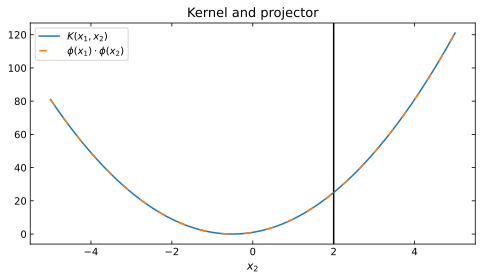

In [2]:
def kernel(x1, x2):
    return (1 + x1*x2)**2

def projector(x):
    return np.array([1, 2**0.5*x, x**2])

x1 = 2
x2s = np.linspace(-5, 5, 250)

# Check if kernel(x1, x2) = projector(x1) @ projector(x2) for all x2
fig, ax = plt.subplots(figsize=(8,4))
ax.set(xlabel=r'$x_2$', title="Kernel and projector")
ax.axvline(x1, c='k')
ax.plot(x2s, kernel(x1, x2s), label=r'$K(x_1, x_2)$')
ax.plot(x2s, np.array([projector(x2) @ projector(x1) for x2 in x2s]), linestyle=(0, (5, 10)), label=r'$\phi(x_1) \cdot \phi(x_2)$')
ax.legend()

fig.savefig('ex33_fig1.png')

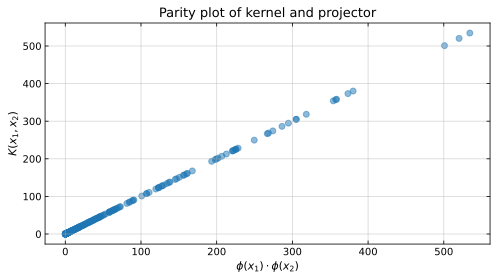

In [3]:
# Parity plot
x1s = np.random.uniform(-5, 5, 250)
x2s = np.random.uniform(-5, 5, 250)

fig, ax = plt.subplots(figsize=(8,4))
ax.grid(alpha=0.5)
ax.set(xlabel=r'$\phi(x_1)\cdot\phi(x_2)$', ylabel=r'$K(x_1,x_2)$', title="Parity plot of kernel and projector")
ax.scatter(
    np.array([projector(x1) @ projector(x2) for x1, x2 in zip(x1s, x2s)]),
    kernel(x1s, x2s),
    alpha=0.5
)

fig.savefig('ex33_fig2.png')

In [4]:
class DiscreteRBF:
    def __init__(self, kernel, projector, xwidth=0.1):
        self.kernel = kernel
        self.projector = projector
        self.xwidth = xwidth
    
    def descriptor(self, x):
        """
        Return the descriptor of x, denoted Φ (Phi) in the course material
        """
        pass
    
    def draw(self, ax):
        pass